In [20]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [21]:
# Importar as sequências que vamos usar para a construção da árvore filogenética
# É necessário transferir as sequências do blast

s0  = SeqIO.read("seqWFS1.fasta"  , "fasta")
s1  = SeqIO.read("seq_hom1.fasta" , "fasta")
s2  = SeqIO.read("seq_hom2.fasta" , "fasta")
s3  = SeqIO.read("seq_hom3.fasta" , "fasta")
s4  = SeqIO.read("seq_hom4.fasta" , "fasta")
s5  = SeqIO.read("seq_hom5.fasta" , "fasta")

In [22]:
# Renomear as sequências, para facilitar na visualização da árvore filogenética

s0.id  = 'Homo_sapiens'
s1.id  = 'Pan_troglodytes'
s2.id  = 'Nomascus_leucogenys'
s3.id  = 'Pan_paniscus'
s4.id  = 'Gorilla_gorilla_gorilla'
s5.id  = 'Hylobates_moloch'

In [23]:
# Combinar as sequências num único ficheiro

wfs1 = SeqIO.write([s0,s1,s2,s3,s4,s5], "WFS1.fasta", "fasta")

In [24]:
# O ficheiro criado anteriormente, foi colocado no progrma 'Muscle' e realizou-se o alinhamento múltiplo
#https://www.ebi.ac.uk/Tools/msa/muscle/
# O resultado do alinhamento múltiplo foi descarregado, com extensão '.aln', para a diretória do trabalho

In [25]:
# Abrir o ficheiro do alinhamento múltiplo descarregado como MultipleSeqAlignment object 

with open("Muscle_WFS1.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [26]:
# Iniciar a  calcular as distâncias entre ramos, através do modelo de identidade

from Bio.Phylo.TreeConstruction import DistanceCalculator 

calculator = DistanceCalculator('identity')

In [27]:
# Matriz das distâncias

distance_matrix = calculator.get_distance(alignment)

print(distance_matrix)

Nomascus_leucogenys	0
Hylobates_moloch	0.0055370985603543366	0
Gorilla_gorilla_gorilla	0.02436323366555926	0.027685492801771905	0
Homo_sapiens	0.023255813953488413	0.02657807308970095	0.011074197120708784	0
Pan_troglodytes	0.025470653377630104	0.02879291251384275	0.015503875968992276	0.006644518272425293	0
Pan_paniscus	0.025470653377630104	0.02879291251384275	0.015503875968992276	0.006644518272425293	0.0022148394241418012	0
	Nomascus_leucogenys	Hylobates_moloch	Gorilla_gorilla_gorilla	Homo_sapiens	Pan_troglodytes	Pan_paniscus


In [28]:
# Início da construção da árvore filogenética

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

constructor = DistanceTreeConstructor(calculator)

In [29]:
# Construção da árvore filogenética

wfs1_tree = constructor.build_tree(alignment)

wfs1_tree.rooted = True

print(wfs1_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.0033222591362126047, name='Inner3')
            Clade(branch_length=0.016611295681063135, name='Inner1')
                Clade(branch_length=0.001107419712070859, name='Nomascus_leucogenys')
                Clade(branch_length=0.004429678848283478, name='Hylobates_moloch')
            Clade(branch_length=0.006644518272425279, name='Gorilla_gorilla_gorilla')
        Clade(branch_length=0.001661129568106337, name='Homo_sapiens')
        Clade(branch_length=0.003875968992248055, name='Inner2')
            Clade(branch_length=0.0011074197120709006, name='Pan_paniscus')
            Clade(branch_length=0.0011074197120709006, name='Pan_troglodytes')


In [30]:
# Gaurdar a árvore filogenética criada num ficheiro 

Phylo.write(wfs1_tree, "wfs1_tree.xml", "phyloxml")

1

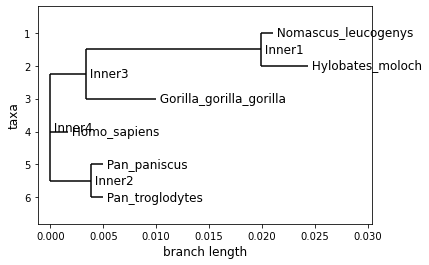

In [35]:
# Criação gráfica da árvore filogenética

import matplotlib
import matplotlib.pyplot as plt

fig = Phylo.draw(wfs1_tree)

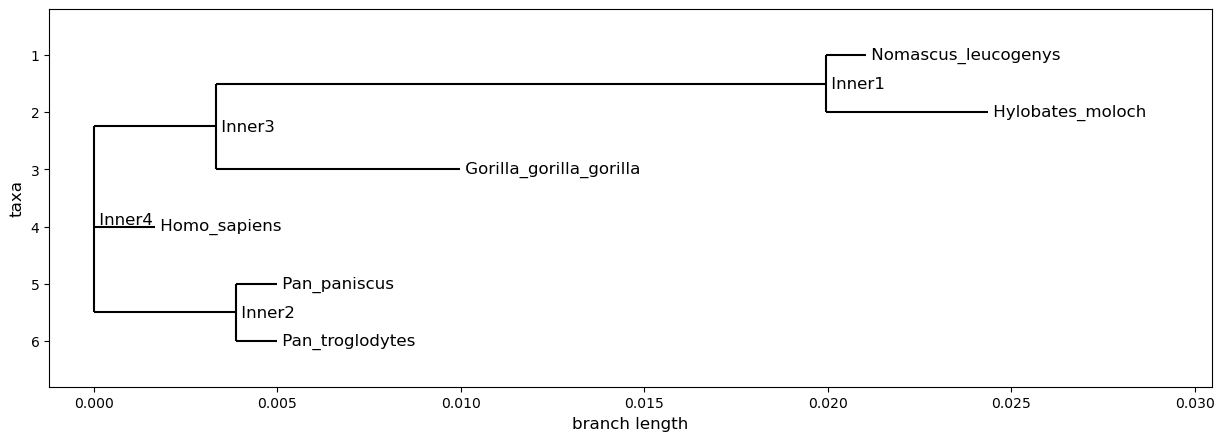

In [34]:
# Melhorar a aparência da árvore filogenética e guardar a figura

fig = plt.figure(figsize=(15, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)             # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(wfs1_tree, axes=axes)
fig.savefig("wfs1_arvorefilogenetica")